# Secure Multi Party Computation (SMPC) - Session 7

***TODO***: Include quote from StarWars

In this session we cover: 
- Introduction to SMPC
- Security Guarantees
- Security Models
- Secret Sharing
- SMPC in PySyft
- Async Execution Model
- CeleryWorker Execution Pools
- GreenThreads
- Gevent
- Retriable Actions
- MPCTensor
- ShareTensor
- Addition Example
- Public and Private Operations
- Psedudo Random Generators
- Beaver Triples
- Private Multiplication
- Arithmetc <> Boolean Sharing
- Bit Decomposition
- Bit Injection
- Private Compare
- Malicious Security
- DP and SMPC
- Future Directions
- Alternatives
- Trial of Courage
- Brain Food
- Homework
- Bonus Materials

## Motivations

As we discussed in the very first session, there are a number of issues that arise from the nature of how `data` is collected and used today which create `barriers` to higher `productivity`, `efficiency` and `utility` from the existing data we already have.

While previous sessions have focused on how we can protect individuals `Output Privacy` by placing access at a distance and adding carefully crafted noise to results to prevent data leakage, there are a number of use cases which pose more issues that require solving.

While keeping the `Data Scientist` at a distance prevents them from `copying` the data, what happens when `Data Owners` and `Data Scientists` want to work across multiple private datasets in a `Federated Learning` scenario?

Do we just copy the data to a central server? Who owns that server and can we trust them not to copy the data?

What about the results? Who controls and arbitrates the `Shared Governance` of results calculated on inputs from different organizations?

We have also made a lot of assumptions about the idea that the thing to be protected is `Data` and not a `Model`, but a model can also be expressed as data. Consider the weights of a Neural Network which are both data and a model and just like personal data the possibility of being able to utilize a model while also protecting it from leaking creates a lot of value and usecases.

What if the data or model we want to protect is not already inside the `domain` where we want to use it? If the `Data Owner` or `Model Owner` is outside a `domain` then sending in their valuable numbers to someone who controls the server and its RAM or Hard Disks poses some potential trust issues.

We have identified previously that there are several solutions to these problems in the form of PETs (Privacy Enhancing Technologies) which involve a variety of `encryption` or `protection` schemes. In the case of `encryption` the key to this working is the ability to provide algorithms which provide encrypted data which can still be computed on.

This notebook will cover aspects of one such solution called `Secure Multi-Party Computation` (SMPC).

## Introduction to SMPC

Secure Mutli-party Computation(SMPC) allows parties `P1, . . . , Pn` be a set of parties, with private inputs` x1, . . . , xn` jointly compute a function `f(x1, . . . , xn)`.

Such that the following condition holds:
- **Correctness**: The output is consistent with f and the inputs xi
- **Privacy**: Nothing about the private inputs is revealed beyond whatever information is contained in the public output.

In [ ]:
#TODO: include image showing picture of multiparty computation

In [ ]:
# Section: Motivations for SMPC , example scenarios

## Secret Sharing

Secret Sharing is one of the primitives required for smpc , lets view secret sharing through an use case scenario.

**Problem** : In many cases when all the sensitive data is stored in a isolated location it might account for a single point of failure.
Ex: 
- Nuclear Launch Codes
- Private Key Management

If we could split the shares shares such that , even if some of the locations are compromised it would not reveal the underlying secret.


Secret Sharing consists of two phases:
- Sharing
- Reconstruction

In the sharing phase , a trusted `Dealer` splits original secret `s` into `n` shares, where the `n` denotes the parties participating in the computation. 

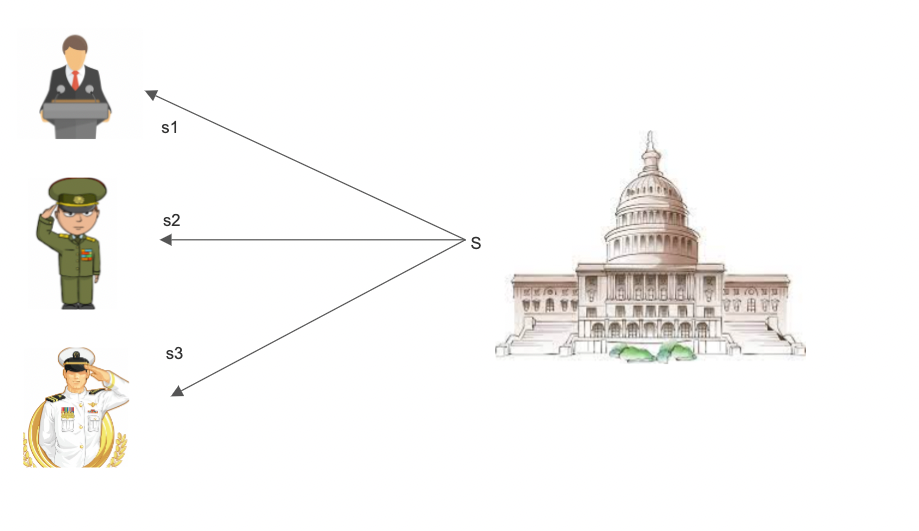

In the Reconstruction Phase the parties combine their original shares to get the original secret

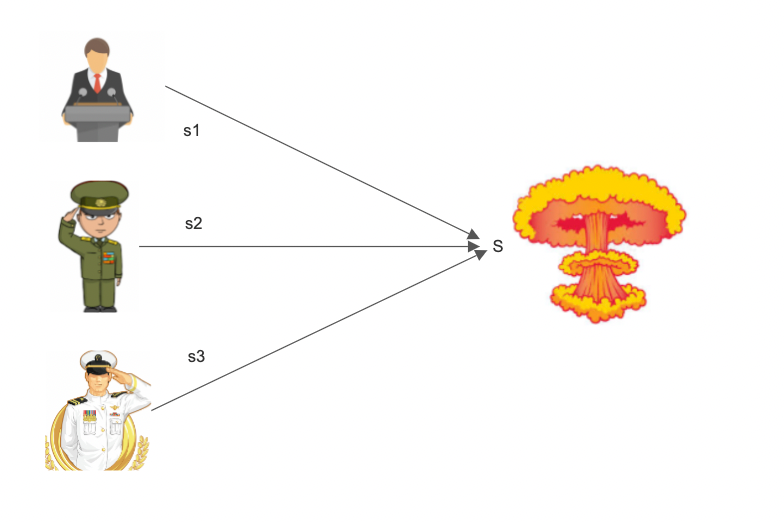

### Additive Secret Sharing

Additive Secret Sharing is an n-out-of-n secret sharing where all the shares are required to reconstuct the original secret.

The shares are defined over a finite space, assume we define our share over finite space  `Z`

In the above picture of nuclear launch codes the secret `S` is split into three parts  `s1`,`s2`,`s3` such that the  sum equals the secret
`S = (s1+s2+s3) mod Z`

All the shares are required to construct the original secret

There are other secret sharing schemes like `Threshold Secret Sharing` which allow us to reconstruct the secret only if a subset of the shares are present

In [4]:
#TODO: Leave reference for threshold secret sharing.

## SMPC Boolean Circuit Example

Lets take a toy example where two parties `Alice` and `Bob` each  have two private bits `a,a'` and `b,b'` and would like to compute a function `ab(a'+b')`

In this Example , consider all inputs as `bits`

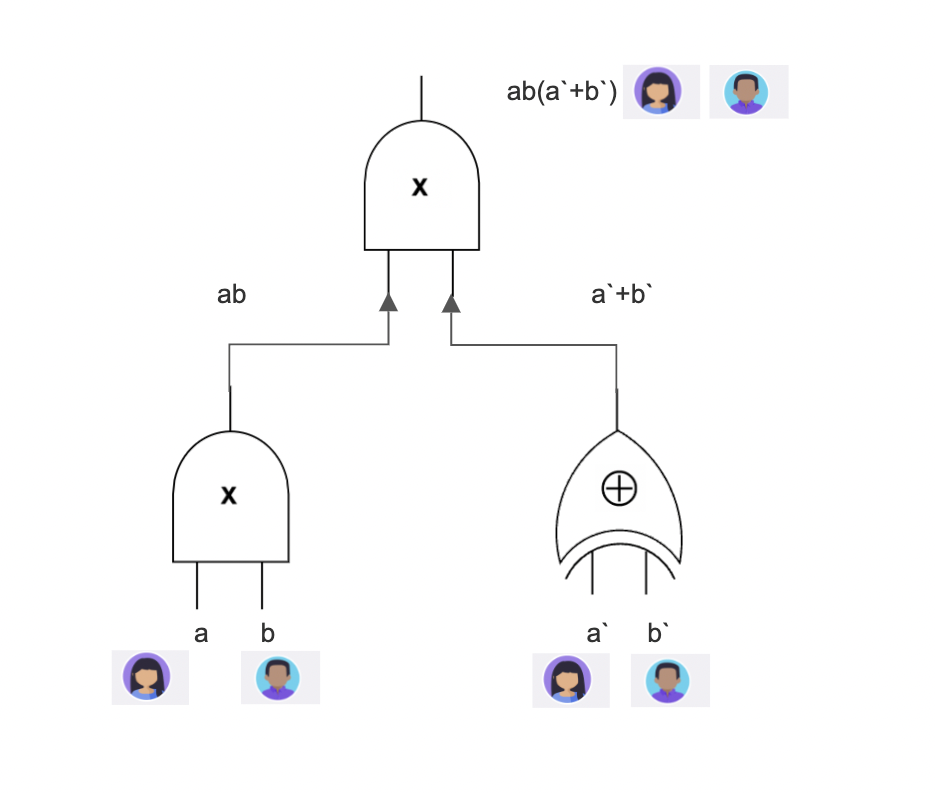

Let's break down the problem see how we could compute the basic gates.

We have to two basic gates in the computation:
- XOR Gate
- AND Gate

### XOR Gate

Consider two parties, Alice and Bob having private inputs/shares of private inputs a and b, would like to compute a⊕b 

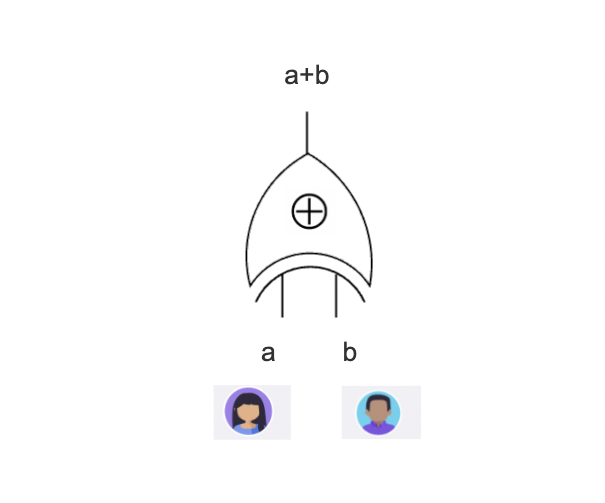

Let us ideate this problem from a `secret sharing` scenario, in this particular example both Alice and Bob own the private inputs, in many cases the private inputs are not owned by the parties computing the function

External stakeholders might delegate Alice and Bob to do the computation

Assume there are two stakeholder `S1` and `S2` having private inputs would like to compute XOR by secure computation.

The Stakeholders do not want Alice and Bob to know the private values,hence they secret share the private inputs between Alice and Bob.

In the Sharing Phase , 
The Stakeholders share their corresponding private inputs

They generate random bit `r` independently and construct the Shares as

S1 constructs shares α ,β

α  = (a⊕r1) <br>
β =  r1 <br> 
such that  α⊕β = a

### TODO replace with nice equation diagram, they do not look good.

In a Similar Way S2 constructs shares α',β'

α'  = (b⊕r2) <br>
β' =  r2 <br> 
such that  β⊕β' = b

The stakeholders give the shares α,α' to Alice and β,β' to Bob

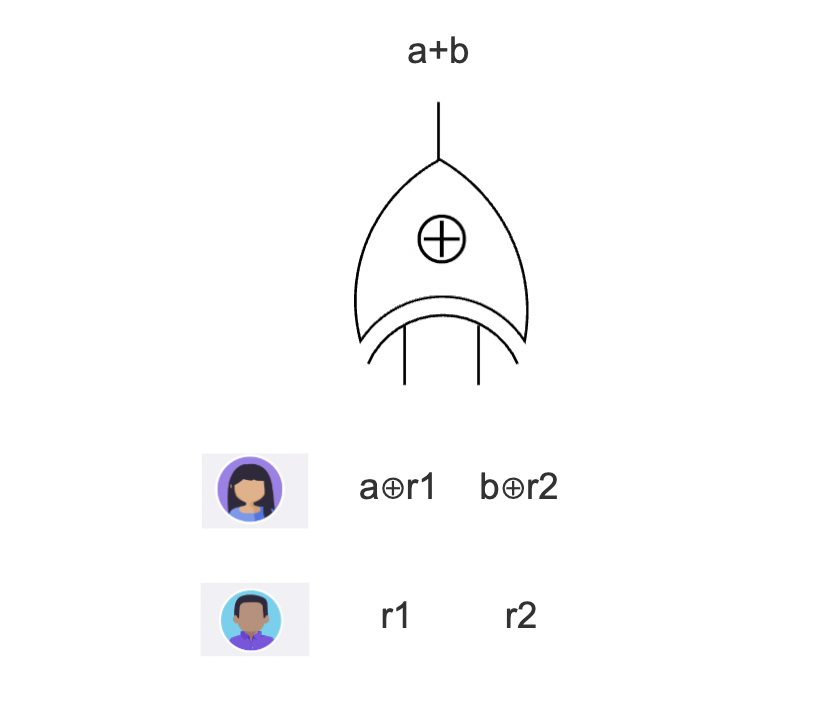

Now Both Alice and Bob have secret shared input to each of the input wires.

The important point is that the bits that Alice and bob see are random, through which they do not know the original private inputs

To compute XOR in secret shared manner, they locally xor the shares of each wire.

Alice xor's the shares α,α' as γ(gamma) <br>
γ = α ⊕ α'

Bob xor's the shares β,β' as δ(delta) <br>
δ = β⊕β'

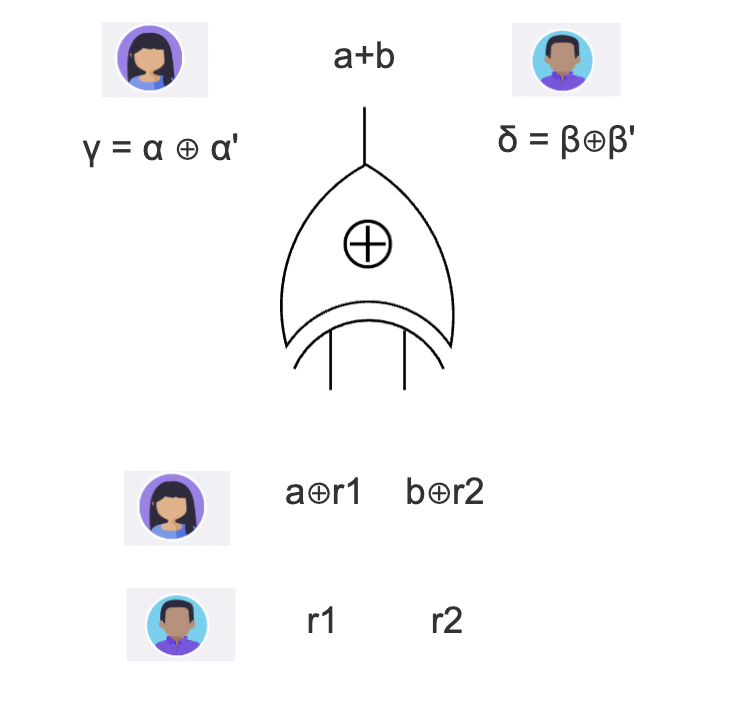

The values γ,δ are the final output shares.


Our claim is that reconstruction of the output shares would be the xor of private inputs a,b

Reconstruction of output shares: <br>
γ ⊕ δ = (α ⊕ α')⊕( β ⊕ β') <br>
Using Associativity property of xor and rearranging the equations.<br>
γ ⊕ δ = (α ⊕ β)⊕ ( α'⊕ β') <br>
γ ⊕ δ = a⊕b


During the computation, Alice and Bob see only random bits  held by them and perform the protocol.

During the reconstruction of the shares we obtain the xor function of the private inputs.

Alice  and Bob either send each of their shares to the stakeholder for them to reconstruct individually or they <br>
send it between themselves and make it a public output.

Let's take look at the XOR table

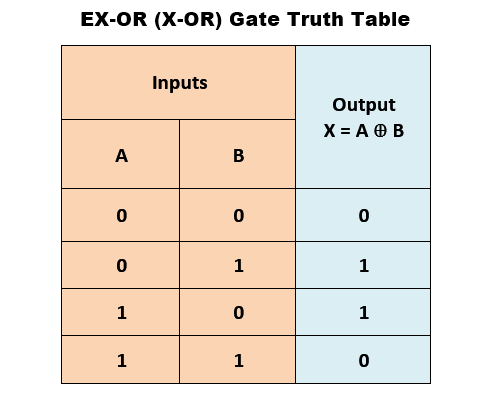

If two parties want to compute XOR securely , the table represents the inputs and outputs possible.

In XOR function, each party along with its's private input and output, could figure out the private input of the other party.

Does  the former protocol described above does not compute the xor function securely?

The SMPC security gurantees states that the adversary/maliciouis party could learn information from its private input and public output , but not beyond that

Since the XOR function itself ,reveals the private input, it is not a security Leakage

In [ ]:
#Explain computing Addition,Multiplication Secret Shared thorough above toy example and expand it to PySyft

## Security Guarantees

Explantion of Computational, Information Theoretic settings.

## Security Models

Explanation of semi-honest, malicious and covert security

## Secret Sharing

In [ ]:
Various Secret Sharing, like VSS, Shamir's

## Arithmetic Secret Sharing

## SMPC in PySyft